In [1]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Annotated
from langgraph.types import Send
import operator

In [2]:
from typing import Union

class State(TypedDict):
    words: list[str]
    output: Annotated[list[dict[str, Union[str, int]]], operator.add]

graph_builder = StateGraph(State)

In [3]:
def node_1(state: State):
    print(f"I want to count {len(state['words'])} words in my state.")

def node_2(word: str):
    return {
        "output" : [
            {
                "word": word,
                "letters": len(word)
            }
        ]
    }


In [4]:
graph_builder.add_node("node_1", node_1)
graph_builder.add_node("node_2", node_2)

def dispatcher_fn(state: State):
    return [Send("node_2", word) for word in state["words"]]
    # words = state["words"]
    # sends = []
    # for word in words:
    #     sends.append(Send("node_2", word))    
    # return sends
    

graph_builder.add_edge(START, "node_1")
graph_builder.add_conditional_edges("node_1", dispatcher_fn, ["node_2"])
graph_builder.add_edge("node_2", END)


In [5]:


graph = graph_builder.compile()

graph.invoke({"words": ["hello", "world", "how", "are", "you", "doing"]})




I want to count 6 words in my state.


{'words': ['hello', 'world', 'how', 'are', 'you', 'doing'],
 'output': [{'word': 'hello', 'letters': 5},
  {'word': 'world', 'letters': 5},
  {'word': 'how', 'letters': 3},
  {'word': 'are', 'letters': 3},
  {'word': 'you', 'letters': 3},
  {'word': 'doing', 'letters': 5}]}

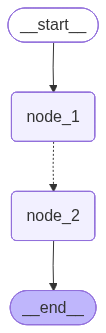

In [6]:
graph